This notebook takes all of the files with lists of patients and puts them into one dataframe.

In [1]:
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dirname = '../../data/patients/'
files = os.listdir(dirname)

files = [f for f in files if f.endswith('.samples.txt')]
print('\n'.join(files))
files = [dirname + f for f in files]

prevalence_calculation.bal-gastric_fluid.mbs_consolidated.samples.txt
aspiration_classifiers_exchanged_OTUs.gastric_fluid.samples.txt
figure2.between_patient_jsd_2014_permanova.samples.txt
exchange_calculation.bal-throat_swab.samples.txt
figure2.2016_pcoa.samples.txt
figure2.between_patient_jsd_2016_permanova.samples.txt
figure3.site_classifiers.samples.txt
aspiration_classifiers.bal.samples.txt
aspiration_classifiers.gastric_fluid.samples.txt
figure2.between_patient_jsd.samples.txt
aspiration_classifiers_exchanged_OTUs.bal.samples.txt
aspiration_classifiers_exchanged_OTUs.bal_throat_swab.samples.txt
figure3.within_patient_beta_div.samples.txt
exchange_calculation.bal-gastric_fluid.samples.txt
figure2.2014_pcoa.samples.txt
figure5.reflux_correlation.samples.txt
figure4.asp_vs_nonasp_beta.samples.txt
aspiration_classifiers_exchanged_OTUs.bal_gastric_fluid.samples.txt
exchange_calculation.gastric_fluid-throat_swab.samples.txt
aspiration_classifiers_exchanged_OTUs.throat_swab.samples.txt


In [3]:
# Need metadata file to get subjects belonging to each sample
fmeta = '../../data/clean/rosen.metadata.clean'
meta = pd.read_csv(fmeta, sep='\t', index_col=0)

In [4]:
subj2site = {}
subj2analysis = {}

for f in files:
    analysis_name = f.split(dirname)[1].split('.samples.txt')[0]
    print(analysis_name)
    df = pd.read_csv(f, names=[analysis_name])

    # Add in subject ID and site labels
    df = pd.merge(df, meta[['subject_id', 'site']], 
                  left_on=analysis_name, right_index=True, how='left')

    # Update the dictionaries tracking sites and analyses done
    # for each patient
    for index, row in df.iterrows():
        subj = row['subject_id']
        site = row['site']

        # Update subject to site map
        if subj in subj2site:
            if site not in subj2site[subj]:
                subj2site[subj] += [site]
        else:
            subj2site[subj] = [site]

        # Update subject to analysis map
        if subj in subj2analysis:
            if analysis_name not in subj2analysis[subj]:
                subj2analysis[subj] += [analysis_name]
        else:
            subj2analysis[subj] = [analysis_name]

prevalence_calculation.bal-gastric_fluid.mbs_consolidated
aspiration_classifiers_exchanged_OTUs.gastric_fluid
figure2.between_patient_jsd_2014_permanova
exchange_calculation.bal-throat_swab
figure2.2016_pcoa
figure2.between_patient_jsd_2016_permanova
figure3.site_classifiers
aspiration_classifiers.bal
aspiration_classifiers.gastric_fluid
figure2.between_patient_jsd
aspiration_classifiers_exchanged_OTUs.bal
aspiration_classifiers_exchanged_OTUs.bal_throat_swab
figure3.within_patient_beta_div
exchange_calculation.bal-gastric_fluid
figure2.2014_pcoa
figure5.reflux_correlation
figure4.asp_vs_nonasp_beta
aspiration_classifiers_exchanged_OTUs.bal_gastric_fluid
exchange_calculation.gastric_fluid-throat_swab
aspiration_classifiers_exchanged_OTUs.throat_swab
prevalence_calculation.bal-throat_swab.mbs_consolidated
prevalence_calculation.gastric_fluid-throat_swab.mbs_consolidated
figure1.overview_plots
aspiration_classifiers.bal_throat_swab
aspiration_classifiers.throat_swab


In [5]:
print(len(subj2site), len(subj2analysis))

(222, 222)


## Concatenate to dataframes

In [6]:
sitedf = pd.DataFrame(index=subj2site.keys(), columns=['bal', 'gastric_fluid', 'throat_swab', 'stool'])
for subj in subj2site:
    sitedf.loc[subj, subj2site[subj]] = True
sitedf = sitedf.fillna(False)

In [14]:
sitedf.reset_index().melt(id_vars='index', var_name='site').query('value == True').groupby('site').size()

site
bal              102
gastric_fluid    147
stool             25
throat_swab      176
dtype: int64

In [145]:
# Manually order the analyses according to how they show up in the paper
analyses = [
    'figure1.overview_plots',
    'figure2.2016_pcoa',
    'figure2.2014_pcoa',
    'figure2.between_patient_jsd_2016_permanova',
    'figure2.between_patient_jsd_2014_permanova',
    'figure2.between_patient_jsd',
    'figure3.site_classifiers',
    'figure3.within_patient_beta_div',

    'figure4.asp_vs_nonasp_beta',
    
    'exchange_calculation.bal-throat_swab',
    'exchange_calculation.bal-gastric_fluid',
    'exchange_calculation.gastric_fluid-throat_swab',
    
    'prevalence_calculation.bal-gastric_fluid.mbs_consolidated',
    'prevalence_calculation.bal-throat_swab.mbs_consolidated',
    'prevalence_calculation.gastric_fluid-throat_swab.mbs_consolidated',

    'aspiration_classifiers_exchanged_OTUs.bal',
    'aspiration_classifiers_exchanged_OTUs.gastric_fluid',
    'aspiration_classifiers_exchanged_OTUs.throat_swab',
    'aspiration_classifiers_exchanged_OTUs.bal_gastric_fluid',
    'aspiration_classifiers_exchanged_OTUs.bal_throat_swab',
    
    'aspiration_classifiers.bal',
    'aspiration_classifiers.gastric_fluid',
    'aspiration_classifiers.throat_swab',
    'aspiration_classifiers.bal_throat_swab',
    'aspiration_classifiers.bal_gastric_fluid',
    'aspiration_classifiers.throat_swab_gastric_fluid',
    'aspiration_classifiers.bal_throat_swab_gastric_fluid',

    'figure5.reflux_correlation'
]

analysisdf = pd.DataFrame(index=subj2analysis.keys(),
                          columns=analyses)
for subj in subj2analysis:
    analysisdf.loc[subj, subj2analysis[subj]] = True
analysisdf = analysisdf.fillna(False)

In [158]:
# Mostly for me: merge the analysis dataframe and patient dataframe
site_and_analyses = pd.merge(sitedf, analysisdf, left_index=True, right_index=True)

## Write to file

TO DO: put this in the Makefile (dependencies should be the scripts that make the individual patient files), and make one of these final patient files the dependency. Also move the intermediate patient files to the analysis folder (not the final folder).

In [159]:
sitedf.to_csv('../../final/supp_files/patients_with_sites_sampled.csv', sep=',')
analysisdf.to_csv('../../final/supp_files/patients_used_in_each_analysis.csv', sep=',')
site_and_analyses.to_csv('../../final/supp_files/combined_patient_site_and_analyses.csv', sep=',')

# Visualize these patients

Let's make some heatmaps to see which patients we have

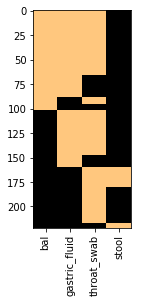

In [125]:
# Look at and sort patients by all sites
plt.imshow(
    sitedf.astype(int).sort_values(by=['bal', 'gastric_fluid', 'throat_swab', 'stool'], ascending=False),
    aspect=0.04,
    cmap=plt.get_cmap('copper')
     )

_ = plt.gca().set_xticks([0, 1, 2, 3])
_ = plt.gca().set_xticklabels(sitedf.columns, rotation=90)

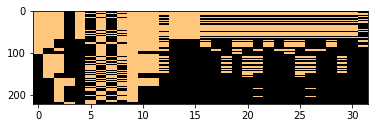

In [150]:
# Sites and analyses

plt.imshow(
    site_and_analyses.astype(int).sort_values(by=['bal', 'gastric_fluid', 'throat_swab', 'stool'], ascending=False),
    aspect=0.04,
    cmap=plt.get_cmap('copper')
     )